# **Librerias**

In [1]:
# Importamos

import jax
import torch
import matplotlib
import networkx as nx
import jax.numpy as jaxnp
import matplotlib.pyplot as plt

from jax import random
from jax import jacfwd, jacrev
from jax.nn import relu, sigmoid

# Version 

print(f'JAX Version: {jax.__version__}')
print(f'NetworkX Version: {nx.__version__}')
print(f'Pytorch Version: {torch.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

JAX Version: 0.4.34
NetworkX Version: 3.4.2
Pytorch Version: 2.5.0+cpu
Matplotlib Version: 3.9.2


# **Funciones Compuestas**

$$F(X) = \sigma(W^{[2]} \cdot relu(W^{[1]} \cdot X + b^{[1]}) + b^{[2]})$$

$$z_{1}(X) = W^{[1]} X + b^{[1]}$$
$$a_{1}(z_{1}) = relu(z_{1})$$
$$z_{2}(a_{1}) = W^{[2]} a_{1} + b^{[2]}$$
$$a_{2}(z_{2}) = \sigma(z_{2})$$


**$\text{Derivada Parcial} \frac{\partial}{\partial z_{2}}$:**

$$a_{2}(z_{2}) = \sigma(z_{2})$$
$$a_{2}(z_{2}) = \frac{1}{1 + e^{-z_{2}}}$$
$$da_{2}(z_{2}) = d\frac{1}{1 + e^{-z_{2}}}$$
$$da_{2}(z_{2}) = \frac{ -1 \cdot d(1 + e^{-z_{2}})}{(1 + e^{-z_{2}})^2}$$
$$da_{2}(z_{2}) = \frac{ e^{-z_{2}}}{(1 + e^{-z_{2}})^2}$$
$$da_{2}(z_{2}) = \frac{1}{(1 + e^{-z_{2}})} \cdot  \frac{e^{-z_{2}}}{(1 + e^{-z_{2}})}$$
$$da_{2}(z_{2}) = \sigma(z_{2}) \cdot  (1 - \sigma(z_{2}))$$

**$\text{Derivada Parcial} \frac{\partial}{\partial W^{[2]}}$:**

$$z_{2}(W^{[2]}) = W^{[2]} a_{1} + b^{[2]}$$
$$dz_{2}(W^{[2]}) = W^{[2]} \cdot da_{1} + dW^{[2]} \cdot a_{1}$$
$$dz_{2}(W^{[2]}) = dW^{[2]} \cdot a_{1}$$
$$dz_{2}(W^{[2]}) = a_{1}^T \cdot dW^{[2]}$$

**$\text{Derivada Parcial} \frac{\partial}{\partial b^{[2]}}$:**

$$z_{2}(b^{[2]}) = W^{[2]} a_{1} + b^{[2]}$$
$$dz_{2}(b^{[2]}) = I_{b_{2}} \cdot db^{[2]}$$

**$\text{Derivada Parcial} \frac{\partial}{\partial a_{1}}$:**

$$z_{2}(a_{1}) = W^{[2]} a_{1} + b^{[2]}$$
$$dz_{2}(a_{1}) = W^{[2]} \cdot da_{1} + dW^{[2]} \cdot a_{1}$$
$$dz_{2}(a_{1}) = W^{[2]} \cdot da_{1}$$

**$\text{Derivada Parcial} \frac{\partial}{\partial z_{1}}$:**

$$a_{1}(z_{1}) = relu(z_{1})$$
$$a_{1}(z_{1}) = max(0, z_{1})$$
$$da_{1}(z_{1}) = diag(1_{z_{1} > 0})$$

**$\text{Derivada Parcial} \frac{\partial}{\partial W^{[1]}}$:**

$$z_{1}(W^{[1]}) = W^{[1]} X + b^{[1]}$$
$$dz_{1}(W^{[1]}) = W^{[1]} \cdot dX + dW^{[1]} \cdot X$$
$$dz_{1}(W^{[1]}) = dW^{[1]} \cdot X$$
$$dz_{1}(W^{[1]}) = X^T \cdot dW^{[1]} $$

**$\text{Derivada Parcial} \frac{\partial}{\partial b^{[1]}}$:**

$$z_{1}(b^{[1]}) = W^{[1]} X + b^{[1]}$$
$$dz_{1}(b^{[1]}) = I_{b_{1}} \cdot db^{[1]}$$

**Regla de la Cadena (Forward-Mode):** 

$$\frac{dF}{dW^{[1]}} = \sigma(z_{2}) \cdot  (1 - \sigma(z_{2})) \cdot W^{[2]} \cdot diag(1_{z_{1} > 0}) \cdot X^T$$
$$\frac{dF}{db^{[1]}} = \sigma(z_{2}) \cdot  (1 - \sigma(z_{2})) \cdot W^{[2]} \cdot diag(1_{z_{1} > 0}) \cdot I_{b_{1}}$$
$$\frac{dF}{dW^{[2]}} = \sigma(z_{2}) \cdot  (1 - \sigma(z_{2})) \cdot a_{1}^T$$
$$\frac{dF}{db^{[2]}} = \sigma(z_{2}) \cdot  (1 - \sigma(z_{2})) \cdot I_{b_{2}}$$

**Regla de la Cadena (Backward-Mode):**

$$\frac{dF}{dW^{[1]}} = X^T \cdot diag(1_{z_{1} > 0}) \cdot W^{[2]} \cdot \sigma(z_{2}) \cdot  (1 - \sigma(z_{2}))$$
$$\frac{dF}{db^{[1]}} = I_{b_{1}} \cdot diag(1_{z_{1} > 0}) \cdot W^{[2]} \cdot \sigma(z_{2}) \cdot  (1 - \sigma(z_{2}))$$
$$\frac{dF}{dW^{[2]}} = a_{1}^T \cdot \sigma(z_{2}) \cdot  (1 - \sigma(z_{2}))$$
$$\frac{dF}{db^{[2]}} = I_{b_{2}} \cdot \sigma(z_{2}) \cdot  (1 - \sigma(z_{2}))$$

### **Grafo**

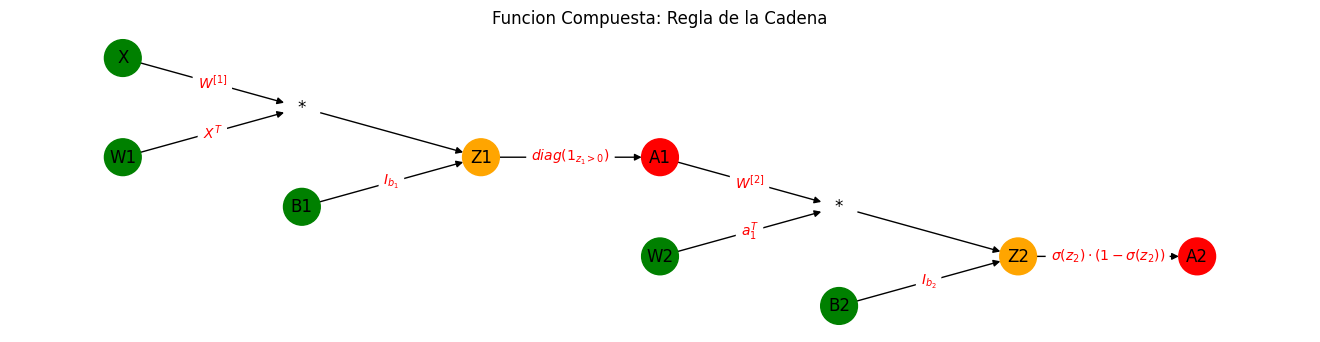

In [2]:
# Creamos un grafo Dirigido 

graph = nx.DiGraph() 

# Definimos los Nodos del grafo 

graph.add_nodes_from(nodes_for_adding = ['X', 'Z1', 'W1', 'B1', 'A1', 'Z2', 'W2', 'B2', 'A2', '*1', '*2']) 

# Definimos los Colores de los Nodos

node_colors = ['green', 'orange', 'green', 'green', 'red', 'orange', 'green', 'green', 'red', 'white', 'white']

# Definimos las Etiquetas Visibles de los Nodos

node_labels = {node: '*' if node in ['*1', '*2'] else node for node in graph.nodes}

# Definimos las conexiones entre los nodos del grafo 

graph.add_edges_from(ebunch_to_add = [('X', '*1'), ('W1', '*1'), ('*1', 'Z1'), ('B1', 'Z1'), ('Z1', 'A1'), ('A1', '*2'), ('W2', '*2'), ('*2', 'Z2'), ('B2', 'Z2'), ('Z2', 'A2')]) 

# Definimos Las Etiquetas de las Conexiones 

edge_labels = {('X', '*1'): '$W^{[1]}$', ('W1', '*1'): '$X^T$', ('*1', 'Z1'): '', ('B1', 'Z1'): '$I_{b_{1}}$', ('Z1', 'A1'): '$diag(1_{z_{1} > 0})$', 
               ('A1', '*2'): '$W^{[2]}$', ('W2', '*2'): '$a_{1}^T$', ('*2', 'Z2'): '', ('B2', 'Z2'): '$I_{b_{2}}$', ('Z2', 'A2'): '$\sigma(z_{2}) \cdot  (1 - \sigma(z_{2}))$'}

# Visualizamos 

plt.figure(figsize = (13, 3))

pos = nx.nx_agraph.graphviz_layout(graph, prog = "dot", args = "-Grankdir=LR") 

nx.draw(graph, with_labels = True, node_size = 700, node_color = node_colors, labels = node_labels, pos = pos) 
nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels, font_size = 10, label_pos = 0.5, font_color = 'red', rotate = False, verticalalignment = 'center', horizontalalignment = 'center')

plt.title(f'Funcion Compuesta: Regla de la Cadena')

plt.show()

### **Funcion Compuesta**

In [3]:
# Definimos la Semilla

key = random.key(0)

# Definimos la funcion matricial

def Fn(X, W1, b1, W2, b2):   
    
    output = jaxnp.matmul(W1, X) + b1
    output = relu(output) 
    output = jaxnp.matmul(W2, output) + b2 
    output = sigmoid(output)
    
    return output

# Definimos las Dimensiones de la Red Neuronal 

input_dim = 4 
hidden_dim = 8 
output_dim = 1

# Definimos la Dimension del Lote de Entrada 

batch_size = 16

# Definimos el Batch de Entrada 

X = jax.random.normal(key = key, shape = (input_dim, batch_size))

# Definimos los Pesos de la Red Neuronal 

W1 = jax.random.normal(key = key, shape = (hidden_dim, input_dim))
W2 = jax.random.normal(key = key, shape = (output_dim, hidden_dim))

b1 = jax.random.normal(key = key, shape = (hidden_dim, 1))
b2 = jax.random.normal(key = key, shape = (output_dim, 1))

### **W1**

In [4]:
# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode)
# Indicamos con respecto a que argumento derivamos en nuestro caso el segundo argumento 1 --> W1)

jacobian_forward = jacfwd(Fn, argnums = 1)(X, W1, b1, W2, b2)
jacobian_backward = jacrev(Fn, argnums = 1)(X, W1, b1, W2, b2)

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward, jacobian_backward, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Respecto a X: \n{jacobian_forward.shape}\n')
print(f'El Jacobiano Backward Respecto a X: \n{jacobian_backward.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Respecto a X: 
(1, 16, 8, 4)

El Jacobiano Backward Respecto a X: 
(1, 16, 8, 4)


In [5]:
# Realizamos el Paso hacia Adelante de la Red Neuronal

Z1 = jaxnp.matmul(W1, X) + b1 
A1 = relu(Z1)         
Z2 = jaxnp.matmul(W2, A1) + b2 
Y = sigmoid(Z2)  

# Calculamos cada una de las Derivadas Parcales que se necesitan

dY_dZ2 = sigmoid(Z2) * (1 - sigmoid(Z2)) 
dZ2_dA1 = W2  
dA1_dZ1 = (Z1 > 0).astype(float)
dZ1_dW1 = X.T 

# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode) 
   
jacobian_forward_einsum = jaxnp.einsum("ob,oh,hb,bi->bhi", dY_dZ2, dZ2_dA1, dA1_dZ1, dZ1_dW1)
jacobian_backward_einsum = jaxnp.einsum("bi,hb,oh,ob->bhi", dZ1_dW1, dA1_dZ1, dZ2_dA1, dY_dZ2)    

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_einsum, jacobian_backward_einsum, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_einsum.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_einsum.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 8, 4)

El Jacobiano Backward Einsum Respecto a X: 
(16, 8, 4)


In [6]:
# Aplicamos el Concepto de la Regla de la Cadena para realizar el Forward-mode

output = dY_dZ2.T @ dZ2_dA1
output = output * dA1_dZ1.T

jacobian_forward_manual = jaxnp.expand_dims(output, axis = -1) @ jaxnp.expand_dims(dZ1_dW1, axis = 1) 

# Aplicamos el Concepto de la Regla de la Cadena para realizar el Backward-mode

output = jaxnp.expand_dims(dZ1_dW1, axis = -1)  @ jaxnp.expand_dims(dA1_dZ1.T, axis = 1)
output = output * dZ2_dA1
output = output * jaxnp.expand_dims(dY_dZ2.T, axis = -1)

jacobian_backward_manual = jaxnp.moveaxis(output, (0, 1, 2), (0, 2, 1))

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_manual, jacobian_backward_manual, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_manual.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_manual.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 8, 4)

El Jacobiano Backward Einsum Respecto a X: 
(16, 8, 4)


### **b1**

In [7]:
# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode)
# Indicamos con respecto a que argumento derivamos en nuestro caso el segundo argumento 2 --> b1)

jacobian_forward = jacfwd(Fn, argnums = 2)(X, W1, b1, W2, b2)
jacobian_backward = jacrev(Fn, argnums = 2)(X, W1, b1, W2, b2)

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward, jacobian_backward, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Respecto a X: \n{jacobian_forward.shape}\n')
print(f'El Jacobiano Backward Respecto a X: \n{jacobian_backward.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Respecto a X: 
(1, 16, 8, 1)

El Jacobiano Backward Respecto a X: 
(1, 16, 8, 1)


In [8]:
# Realizamos el Paso hacia Adelante de la Red Neuronal

Z1 = jaxnp.matmul(W1, X) + b1 
A1 = relu(Z1)         
Z2 = jaxnp.matmul(W2, A1) + b2 
Y = sigmoid(Z2)  

# Calculamos cada una de las Derivadas Parcales que se necesitan

dY_dZ2 = sigmoid(Z2) * (1 - sigmoid(Z2)) 
dZ2_dA1 = W2  
dA1_dZ1 = (Z1 > 0).astype(float)
dZ1_db1 = jaxnp.ones_like(b1)

# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode) 
   
jacobian_forward_einsum = jaxnp.einsum("ob,oh,hb,hi->bho", dY_dZ2, dZ2_dA1, dA1_dZ1, dZ1_db1)
jacobian_backward_einsum = jaxnp.einsum("hi,hb,oh,ob->bho", dZ1_db1, dA1_dZ1, dZ2_dA1, dY_dZ2)    

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_einsum, jacobian_backward_einsum, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_einsum.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_einsum.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 8, 1)

El Jacobiano Backward Einsum Respecto a X: 
(16, 8, 1)


In [9]:
# Aplicamos el Concepto de la Regla de la Cadena para realizar el Forward-mode

output = dY_dZ2.T @ dZ2_dA1
output = output * dA1_dZ1.T

jacobian_forward_manual = jaxnp.expand_dims(output, axis = -1) * jaxnp.expand_dims(dZ1_db1, axis = 0)

# Aplicamos el Concepto de la Regla de la Cadena para realizar el Backward-mode

output = jaxnp.expand_dims(dZ1_db1, axis = 0) * jaxnp.expand_dims(dA1_dZ1.T, axis = -1)
output = output * jaxnp.expand_dims(dZ2_dA1.T, axis = 0)

jacobian_backward_manual = output * jaxnp.expand_dims(dY_dZ2.T, axis = -1)

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_manual, jacobian_backward_manual, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_manual.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_manual.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 8, 1)

El Jacobiano Backward Einsum Respecto a X: 
(16, 8, 1)


### **W2**

In [10]:
# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode)
# Indicamos con respecto a que argumento derivamos en nuestro caso el segundo argumento 3 --> W2)

jacobian_forward = jacfwd(Fn, argnums = 3)(X, W1, b1, W2, b2)
jacobian_backward = jacrev(Fn, argnums = 3)(X, W1, b1, W2, b2)

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward, jacobian_backward, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Respecto a X: \n{jacobian_forward.shape}\n')
print(f'El Jacobiano Backward Respecto a X: \n{jacobian_backward.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Respecto a X: 
(1, 16, 1, 8)

El Jacobiano Backward Respecto a X: 
(1, 16, 1, 8)


In [11]:
# Realizamos el Paso hacia Adelante de la Red Neuronal

Z1 = jaxnp.matmul(W1, X) + b1 
A1 = relu(Z1)         
Z2 = jaxnp.matmul(W2, A1) + b2 
Y = sigmoid(Z2)  

# Calculamos cada una de las Derivadas Parcales que se necesitan

dY_dZ2 = sigmoid(Z2) * (1 - sigmoid(Z2)) 
dZ2_dW2 = A1.T

# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode) 

jacobian_forward_einsum = jaxnp.einsum('ob,bh->boh', dY_dZ2, dZ2_dW2)
jacobian_backward_einsum = jaxnp.einsum("bh,ob->boh", dZ2_dW2, dY_dZ2)    

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_einsum, jacobian_backward_einsum, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_einsum.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_einsum.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 1, 8)

El Jacobiano Backward Einsum Respecto a X: 
(16, 1, 8)


In [12]:
# Aplicamos el Concepto de la Regla de la Cadena para realizar el Forward-mode

jacobian_forward_manual = jaxnp.expand_dims(dY_dZ2.T, axis = -1) @ jaxnp.expand_dims(dZ2_dW2, axis = 1) 

# Aplicamos el Concepto de la Regla de la Cadena para realizar el Backward-mode

output = jaxnp.expand_dims(dZ2_dW2, axis = -1) @ jaxnp.expand_dims(dY_dZ2.T, axis = 1)

jacobian_backward_manual = jaxnp.moveaxis(output, (0, 1, 2), (0, 2, 1))

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_manual, jacobian_backward_manual, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_manual.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_manual.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 1, 8)

El Jacobiano Backward Einsum Respecto a X: 
(16, 1, 8)


### **b2**

In [13]:
# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode)
# Indicamos con respecto a que argumento derivamos en nuestro caso el segundo argumento 4 --> b2)

jacobian_forward = jacfwd(Fn, argnums = 4)(X, W1, b1, W2, b2)
jacobian_backward = jacrev(Fn, argnums = 4)(X, W1, b1, W2, b2)

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward, jacobian_backward, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Respecto a X: \n{jacobian_forward.shape}\n')
print(f'El Jacobiano Backward Respecto a X: \n{jacobian_backward.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Respecto a X: 
(1, 16, 1, 1)

El Jacobiano Backward Respecto a X: 
(1, 16, 1, 1)


In [14]:
# Realizamos el Paso hacia Adelante de la Red Neuronal

Z1 = jaxnp.matmul(W1, X) + b1 
A1 = relu(Z1)         
Z2 = jaxnp.matmul(W2, A1) + b2 
Y = sigmoid(Z2)  

# Calculamos cada una de las Derivadas Parcales que se necesitan

dY_dZ2 = sigmoid(Z2) * (1 - sigmoid(Z2)) 
dZ2_dB2 = jaxnp.ones_like(b2)  

# Calculamos la Matriz Jacobiana utilizando los dos Metodos (Forward-mode y Backward-mode) 
   
jacobian_forward_einsum = jaxnp.einsum("ob,of->bfo", dY_dZ2, dZ2_dB2)
jacobian_backward_einsum = jaxnp.einsum("of,ob->bfo", dZ2_dB2, dY_dZ2)    

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_einsum, jacobian_backward_einsum, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_einsum.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_einsum.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 1, 1)

El Jacobiano Backward Einsum Respecto a X: 
(16, 1, 1)


In [15]:
# Aplicamos el Concepto de la Regla de la Cadena para realizar el Forward-mode

jacobian_forward_manual = jaxnp.expand_dims(dY_dZ2.T, axis = -1) * jaxnp.expand_dims(dZ2_dB2, axis = 0)

# Aplicamos el Concepto de la Regla de la Cadena para realizar el Backward-mode

jacobian_backward_manual = jaxnp.expand_dims(dZ2_dB2, axis = 0) * jaxnp.expand_dims(dY_dZ2.T, axis = -1)

# Visualizamos

print(f'Los dos Metodos dan el Mismo Resultado: {jaxnp.allclose(jacobian_forward_manual, jacobian_backward_manual, rtol = 1e-07)}\n')
print(f'El Jacobiano Forward Einsum Respecto a X: \n{jacobian_forward_manual.shape}\n')
print(f'El Jacobiano Backward Einsum Respecto a X: \n{jacobian_backward_manual.shape}')

Los dos Metodos dan el Mismo Resultado: True

El Jacobiano Forward Einsum Respecto a X: 
(16, 1, 1)

El Jacobiano Backward Einsum Respecto a X: 
(16, 1, 1)
